In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso, RidgeCV, LassoCV, ElasticNet,ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [5]:
df= pd.read_csv("D:\Study\Data Science\Python\ineuron\Data_Set\Admission_Prediction.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [7]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [14]:
# Getting information about each Features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [20]:
#save the Group By output in a dataset which will be used for plotting the graphs
ratings= df.groupby(['GRE Score', 'TOEFL Score', 'University Rating']).size().reset_index().rename(columns={0:'Rating_Count'} )
ratings

,GRE Score,TOEFL Score,University Rating,Rating_Count
0,290.0,100.0,1.0,1
1,290.0,104.0,4.0,1
2,293.0,97.0,2.0,1
3,294.0,93.0,1.0,1
4,294.0,95.0,1.0,1
...,...,...,...,...
381,340.0,113.0,4.0,1
382,340.0,114.0,5.0,1
383,340.0,115.0,5.0,2
384,340.0,120.0,4.0,2


<AxesSubplot:xlabel='GRE Score', ylabel='Rating_Count'>

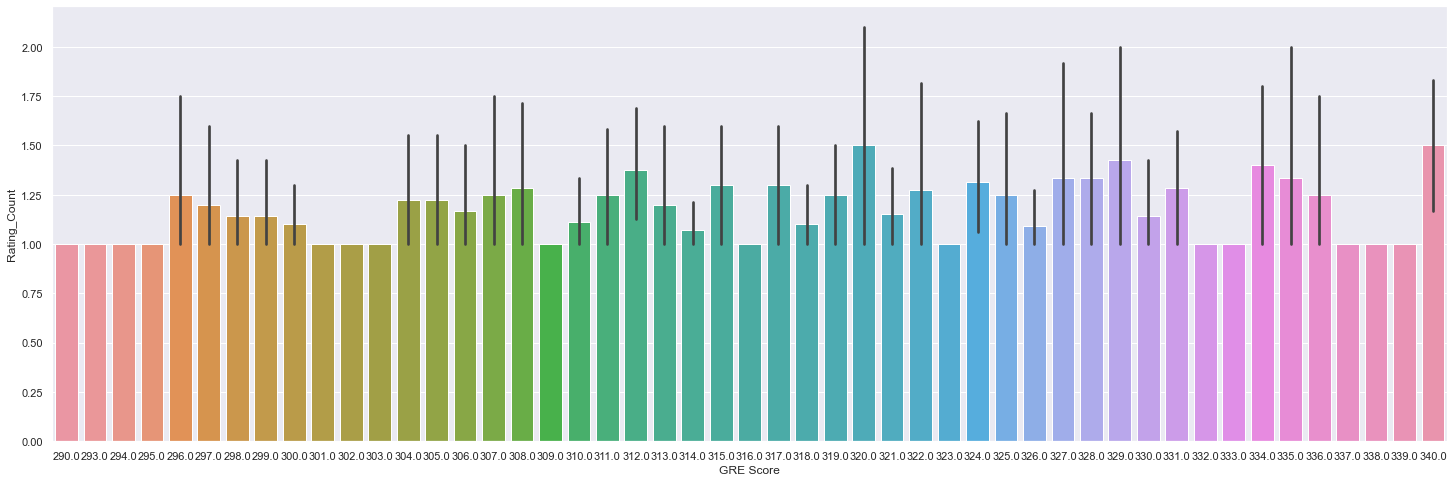

In [23]:
#Plotting Graph based on Rating Count and Aggregate Rating
sns.set(rc = {'figure.figsize':(25,8)})
sns.barplot(x="GRE Score", y="Rating_Count", data=ratings,)

In [25]:
# Override default pandas configuration
pd.options.display.width = 0
pd.options.display.max_rows = 10000
pd.options.display.max_info_columns = 10000

# #Create a profile report
a = ProfileReport(df)
#
# #this will create a report in html format in the folder where project resides
a.to_file('admission_profile_test.html')

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
#To print list of all Gre Score which has duplicate values
df[df['GRE Score'].duplicated()]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
12,13,NaN,112.0,4.0,4.0,4.5,9.10,1,0.78
15,16,314.0,105.0,3.0,3.5,2.5,8.30,0,0.54
21,22,325.0,114.0,4.0,3.0,2.0,8.40,0,0.70
23,24,NaN,119.0,5.0,5.0,4.5,9.70,1,0.95
26,27,322.0,109.0,5.0,4.5,3.5,8.80,0,0.76
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


# Finding Null Values and Replacing it with Mean values

In [13]:
#Null Values in the dataset
df.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [17]:
#another way of finding specific columns which has null values

list_null_features= []

for features in df.columns:
    if df[features].isnull().sum()>0:
        list_null_features.append(features)   
        
print(list_null_features)

['GRE Score', 'TOEFL Score', 'University Rating']


<AxesSubplot:>

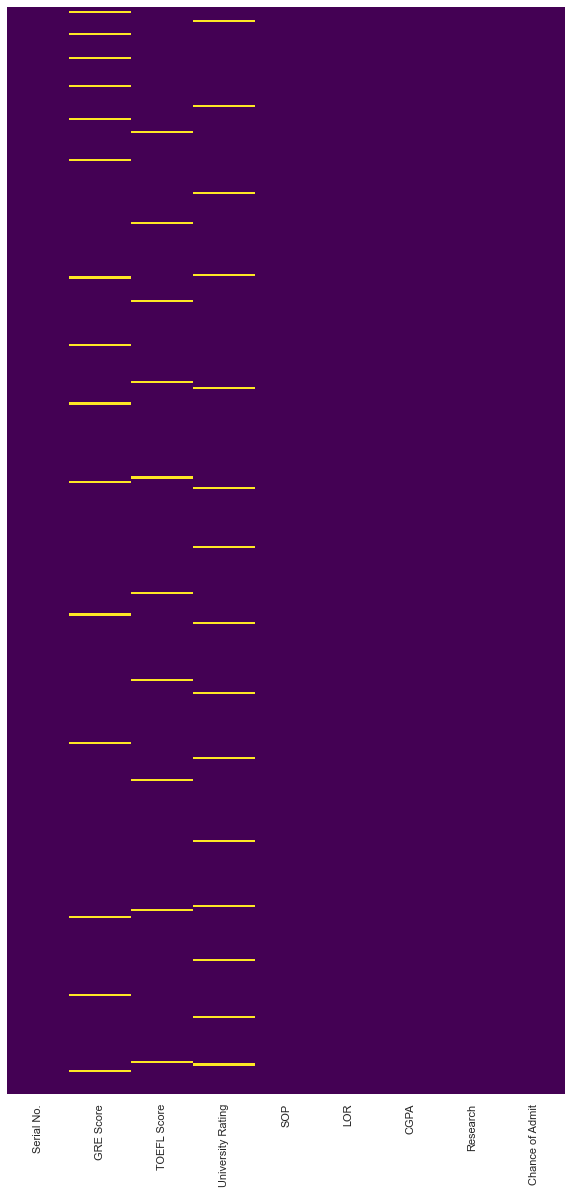

In [19]:
#Using heatmap to plot missing values
sns.set(rc = {'figure.figsize':(10,20)})
sns.heatmap(df.isnull(),yticklabels=False,cbar= False,cmap = 'viridis')

In [26]:
#To print list of all Gre Score which has NAN values in it
df[df['GRE Score'].isnull()]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
12,13,NaN,112.0,4.0,4.0,4.5,9.10,1,0.78
23,24,NaN,119.0,5.0,5.0,4.5,9.70,1,0.95
36,37,NaN,106.0,2.0,4.0,4.0,8.40,0,0.64
51,52,NaN,100.0,2.0,1.5,3.5,7.90,1,0.56
70,71,NaN,118.0,5.0,5.0,5.0,9.64,1,0.94
124,125,NaN,106.0,4.0,2.5,3.0,8.47,0,0.57
155,156,NaN,109.0,3.0,3.0,3.0,8.69,0,0.77
182,183,NaN,100.0,2.0,3.0,3.5,7.88,0,0.68
218,219,NaN,110.0,4.0,3.0,3.5,8.97,1,0.84


In [39]:
# Get the mean of GRE Score
round(df['GRE Score'].mean(),2)

316.56

In [40]:
# Replace NAN values of GRE Score with Mean values of GRE

df['GRE Score']=  df['GRE Score'].fillna(round(df['GRE Score'].mean(),2))
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Gre Score
0,1,337.00,118.0,4.0,4.5,4.5,9.65,1,0.92,False
1,2,324.00,107.0,4.0,4.0,4.5,8.87,1,0.76,False
2,3,316.56,104.0,3.0,3.0,3.5,8.00,1,0.72,True
3,4,322.00,110.0,3.0,3.5,2.5,8.67,1,0.80,False
4,5,314.00,103.0,2.0,2.0,3.0,8.21,0,0.65,False
5,6,330.00,115.0,5.0,4.5,3.0,9.34,1,0.90,False
6,7,321.00,109.0,NaN,3.0,4.0,8.20,1,0.75,False
7,8,308.00,101.0,2.0,3.0,4.0,7.90,0,0.68,False
8,9,302.00,102.0,1.0,2.0,1.5,8.00,0,0.50,False
9,10,323.00,108.0,3.0,3.5,3.0,8.60,0,0.45,False


In [43]:
#To check if any Gre Scores are there with NAN values in it
df[df['GRE Score'].isnull()]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Gre Score


In [44]:
#To check all TOEFL Scores with NAN values in it
df[df['TOEFL Score'].isnull()]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Gre Score
57,58,298.0,NaN,2.0,4.0,2.0,7.60,0,0.46,False
99,100,323.0,NaN,3.0,4.0,4.0,8.88,1,0.79,False
135,136,314.0,NaN,4.0,3.5,4.0,8.77,1,0.82,False
172,173,322.0,NaN,4.0,4.0,5.0,9.13,1,0.86,False
216,217,322.0,NaN,4.0,4.5,4.5,9.26,1,0.91,False
269,270,308.0,NaN,4.0,4.5,5.0,8.34,0,0.77,False
309,310,308.0,NaN,4.0,3.5,3.0,8.60,0,0.70,False
355,356,317.0,NaN,2.0,2.0,3.5,8.12,0,0.73,False
415,416,327.0,NaN,4.0,4.0,4.5,8.75,1,0.76,False
485,486,311.0,NaN,2.0,2.5,3.5,8.34,1,0.70,False


In [45]:
# Replace NAN values of GRE Score with Mean values of GRE

df['TOEFL Score']=  df['TOEFL Score'].fillna(round(df['TOEFL Score'].mean(),2))
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Gre Score
0,1,337.00,118.00,4.0,4.5,4.5,9.65,1,0.92,False
1,2,324.00,107.00,4.0,4.0,4.5,8.87,1,0.76,False
2,3,316.56,104.00,3.0,3.0,3.5,8.00,1,0.72,True
3,4,322.00,110.00,3.0,3.5,2.5,8.67,1,0.80,False
4,5,314.00,103.00,2.0,2.0,3.0,8.21,0,0.65,False
5,6,330.00,115.00,5.0,4.5,3.0,9.34,1,0.90,False
6,7,321.00,109.00,NaN,3.0,4.0,8.20,1,0.75,False
7,8,308.00,101.00,2.0,3.0,4.0,7.90,0,0.68,False
8,9,302.00,102.00,1.0,2.0,1.5,8.00,0,0.50,False
9,10,323.00,108.00,3.0,3.5,3.0,8.60,0,0.45,False


In [46]:
#To check if we have any TOEFL Scores with NAN values in it
df[df['TOEFL Score'].isnull()]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Gre Score
